<a href="https://colab.research.google.com/github/sonG1031/ML_DL_STUDY/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

필요한 수학 지식
- 벡터, 투영 벡터

데이터가 가진 속성을 특성이라고 한다.  
100 * 100 과일 사진을 예로 들면 10000개의 픽셀이 있기 때문에 10000개의 특성이 있는 셈이다.  
머신러닝에서는 이런 특성을 **차원**이라고도 부른다.

# 차원 축소(demensionality reduction)
- 선형 모델의 특성이 많으면 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다.  
- 차원 축소는 **데이터를 가장 잘 나타내는 일부 특성을 선택**하여 **데이터 크기를 줄이고 지도학습 모델의 성능을 항상**시킬 수 있는 방법이다.  
- 또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있다.

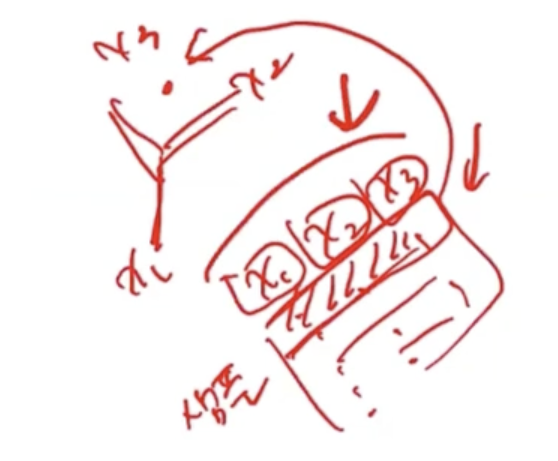

대상을 배열로 보면 축이 차원이지만 차원 축소는 벡터를 대상으로 한다.  
위 그림의 x1, x2, x3를 벡터라 하면 이 벡터는 3차원으로 표시할 수 있다.  
이 차원을 축소하는 것이 차원 축소이다!!


# 주성분 분석(PCA)
- 대표적인 차원 축소 알고리즘
- 데이터에 있는 분산이 큰 방향을 찾는 방법
    - 분산 : 데이터가 널리 퍼져있는 정도
    - 이런 방향을 주성분이라고 함

주성분 : 분산이 큰 방향에서 찾은 직선을 원점을 지나도록 이동한 벡터
- 사이킷런의 PCA모델을 훈련하면 자동으로 특성마다 평균값을 뺴서 원점에 맞춰줌.
- 원본 데이터에 있는 어떤 방향임.
---
>따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음.  
하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.  
- 예를 들어 2차원(축) 샘플 데이터를 주성분에 직각으로 투영하면 1차원(축) 데이터를 만듬. 

>주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.  
>주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터를 원본이 가지고 있는 특성을 잘 나타내고 있을 것이다.
---
> 두번째 주성분은 첫번째 주성분 벡터에 수직이고 분산이 가장 큰 다음 방향에서 찾는다.  
- 수직인 이유는 첫번째 주성분에서 이미 가장 큰 분산의 방향을 찾았기 때문에 비슷한 방향의 주성분을 찾는 것은 비효율적이기 때문이다!

>일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다. 그러나 기술적인 이유로 주성분은  
원본 특성의 개수와 샘플 개수 중 작은 값만큼 찾을 수 있다.

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) 

--2023-02-10 10:00:16--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-02-10 10:00:16--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-02-10 10:00:17--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플 개수
    # 한줄에 10개씩 이미지를 그리기 위해
    rows = int(np.ceil(n/10))
    # 행이 하나면 열의 개수는 행의 개수라서
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap="gray_r")
            axs[i, j].axis('off')
    plt.show()

PCA 클래스의 객체를 만들 때 n_components 매개변수에 주성분의 개수를 지정해야함.

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장됨.

In [ ]:
print(pca.components_.shape)

(50, 10000)


n_components=50 이므로 pca.components_ 배열의 첫번째 차원이 50임.  
두번째 차원은 항상 원본 데이터의 특성 개수와 같은 10000이다.

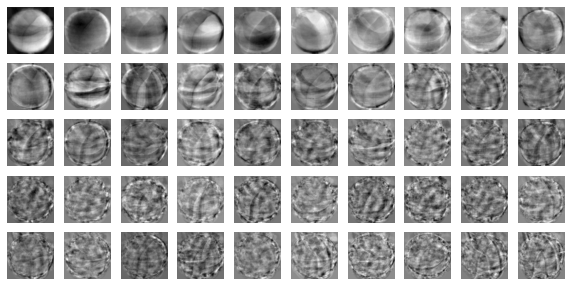

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것.  
주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있음.  
이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수 있음.

In [ ]:
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d) # 차원이 축소됨.
print(fruits_pca.shape)

(300, 10000)
(300, 50)


# 원본 데이터 재구성
앞에서 10000개의 특성을 50개로 축소함. 이로 인해 어느 정도 손실이 발생할 수 밖에 없음.  
그러나 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원**본 데이터를 상당 부분 재구성**할 수 있음.

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) # 재구성
print(fruits_inverse.shape) 

(300, 10000)


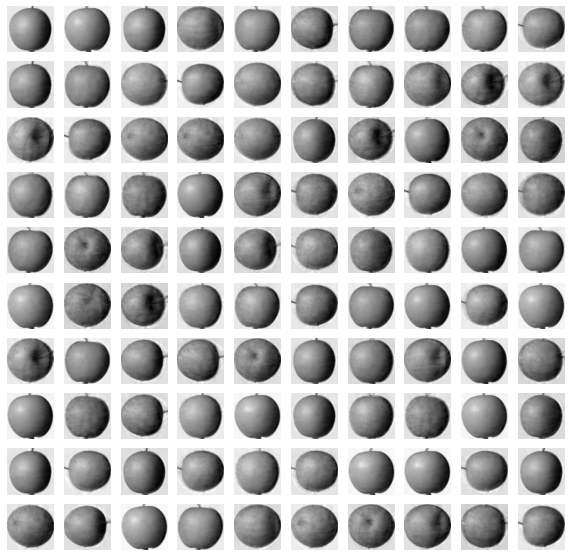

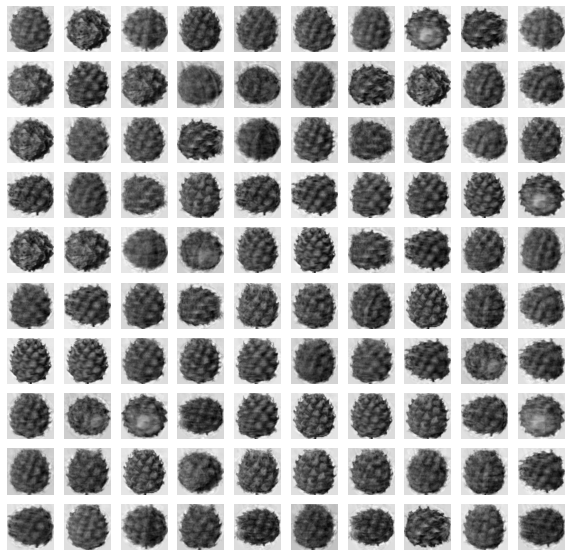

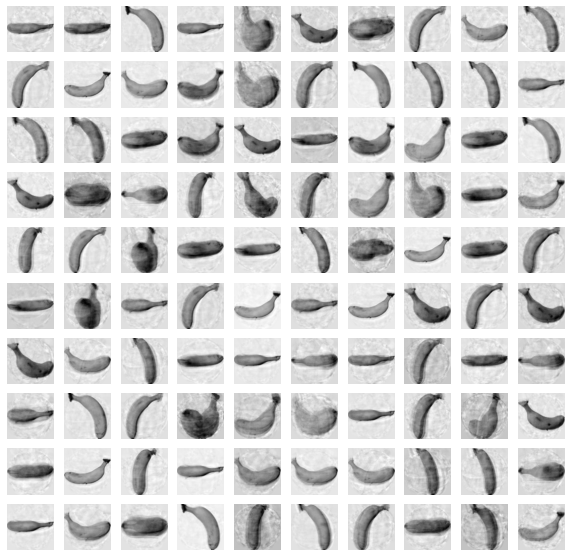

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

이 50개의 특성이 분산을 가장 잘 보존하도록 변환되었기 때문에 잘 복원됨.

# 설명된 분산 (explained variance)
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값  
PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음.  
당연히 첫 번째 주성분의 설명된 분산이 가장 크고, 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [ ]:
print("50개의 주성분으로 표현하고 있는 총 분산 비율 :",np.sum(pca.explained_variance_ratio_))

50개의 주성분으로 표현하고 있는 총 분산 비율 : 0.9214848620601567


92%정도의 분산을 유지하고 있음.

설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는 데 도움이 됨.

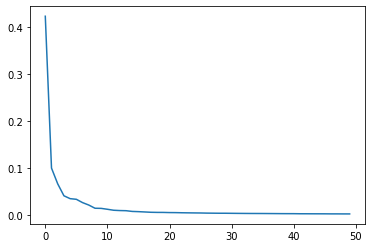

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보면 처음 10개의 주성분이 대부분의 분산을 표현함.

# 다른 알고리즘과 함께 사용

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

로지스틱 회귀는 지도 학습 모델이므로 타깃값이 필요함.  
사과를 0, 파인애플을 1, 바나나를 2로 지정한다.

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate

# 원본 데이터로 교차 검증
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.902608060836792


특성이 10000개나 되므로 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉬움.

In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.029559564590454102


50개의 특성만 사용했는데 정확도가 100%이고 훈련 시간이 0.03초로 20배이상 감소!  
PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음.

PCA 클래스의 n_components 매개변수에 설명된 분산의 비율을 입력할 수도 있음.  
PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음.  
주성분의 개수 대신 0\~1사이의 비율을 실수로 입력하면 됨.

In [ ]:
# 설명된 분산이 50%에 달하는 주성분을 찾음
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.034292745590209964


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


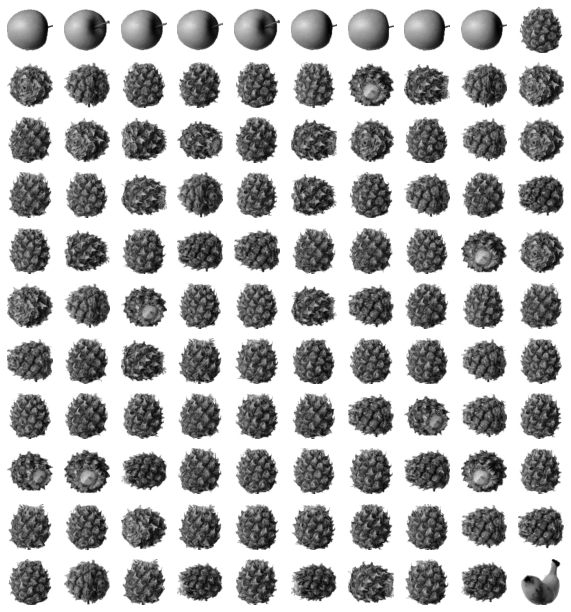

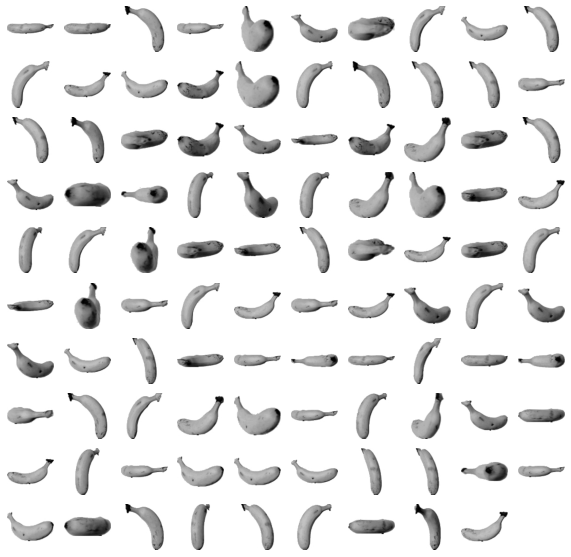

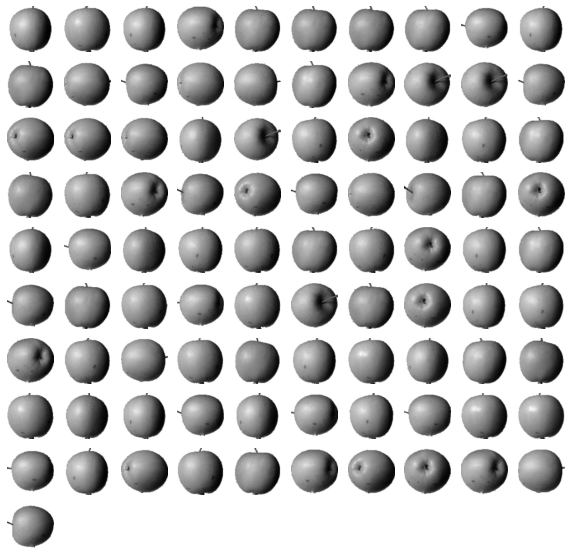

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화이다.  
3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉬움.

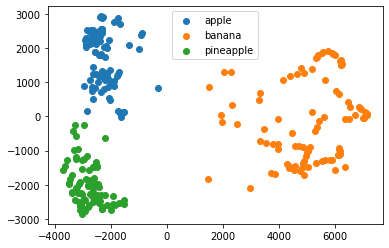

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산점도가 아주 잘 구분된다! 왜 로지스틱 회귀 모델이 교차 검증 점수가 높은지 이유를 알 수 있었다.  
데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있다. 그런 면에서 차원 축소는 매우 유용한 도구다.